In [ ]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Liczba  5


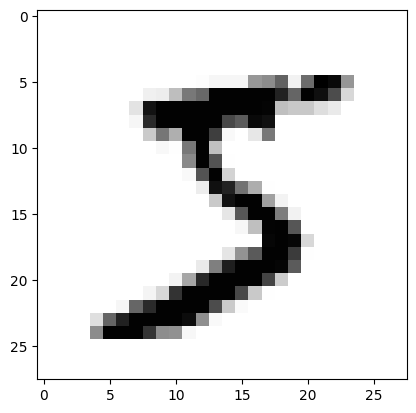

In [ ]:
import matplotlib.pyplot as plt
img = train_images[0].reshape(28,28)
plt.imshow( img, cmap='Greys')
print("Liczba ", train_labels[0])

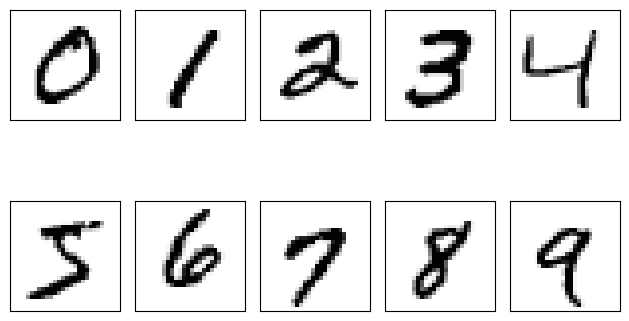

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==i ][0].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

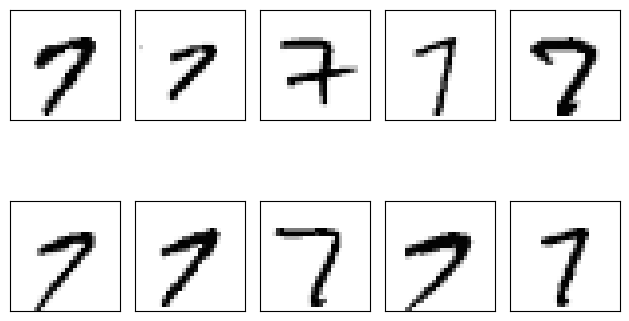

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
 img = train_images[ train_labels==7 ][i].reshape(28,28)
 ax[i].imshow( img, cmap='Greys')
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
#przekształcanie na 2D
x_train = train_images.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 255
x_test = test_images.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 255

In [ ]:
print( train_images[0])
print( x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [ ]:
from keras.utils import to_categorical
#etykiety
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
print( train_labels[0] )
print( y_train[0] )

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras import Sequential

In [ ]:
model = Sequential([
    Dense(512, input_dim=28*28, activation='relu'),
    Dense(256, activation='relu'),
    # Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=3e-4), loss=CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
hist = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=2,
                 validation_data=(x_test, y_test))

Epoch 1/10
938/938 - 11s - loss: 0.2830 - accuracy: 0.9211 - val_loss: 0.1446 - val_accuracy: 0.9558 - 11s/epoch - 11ms/step
Epoch 2/10
938/938 - 9s - loss: 0.1091 - accuracy: 0.9672 - val_loss: 0.0904 - val_accuracy: 0.9720 - 9s/epoch - 10ms/step
Epoch 3/10
938/938 - 13s - loss: 0.0701 - accuracy: 0.9792 - val_loss: 0.0859 - val_accuracy: 0.9726 - 13s/epoch - 14ms/step
Epoch 4/10
938/938 - 8s - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0741 - val_accuracy: 0.9761 - 8s/epoch - 9ms/step
Epoch 5/10
938/938 - 9s - loss: 0.0361 - accuracy: 0.9895 - val_loss: 0.0667 - val_accuracy: 0.9776 - 9s/epoch - 10ms/step
Epoch 6/10
938/938 - 10s - loss: 0.0271 - accuracy: 0.9917 - val_loss: 0.0671 - val_accuracy: 0.9797 - 10s/epoch - 10ms/step
Epoch 7/10
938/938 - 8s - loss: 0.0199 - accuracy: 0.9945 - val_loss: 0.0727 - val_accuracy: 0.9778 - 8s/epoch - 8ms/step
Epoch 8/10
938/938 - 9s - loss: 0.0154 - accuracy: 0.9954 - val_loss: 0.0659 - val_accuracy: 0.9789 - 9s/epoch - 10ms/step
Epoch 9/10
9

In [ ]:
model.evaluate(x_test, y_test, batch_size=128)

79/79 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9800


[0.07036954909563065, 0.9800000190734863]

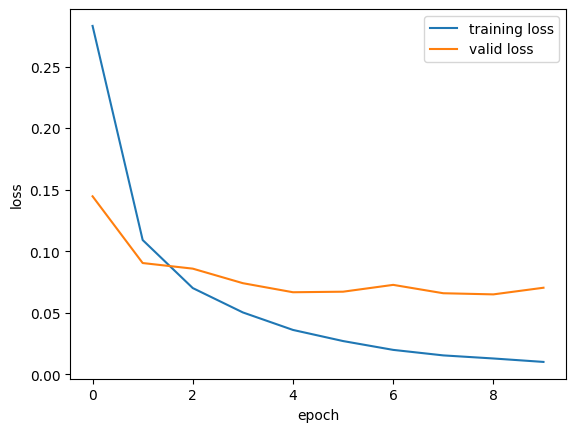

In [ ]:
plt.plot(hist.history['loss'], label='training loss')
plt.plot(hist.history['val_loss'], label='valid loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

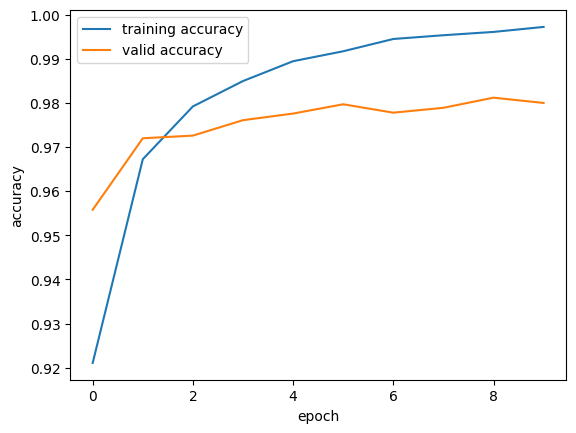

In [ ]:
plt.plot(hist.history['accuracy'], label='training accuracy')
plt.plot(hist.history['val_accuracy'], label='valid accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
# predict_x.shape, y_result.shape

In [ ]:
predict_x_train = model.predict(x_train)
y_result_train = np.argmax(predict_x_train,axis=1)

predict_x_test = model.predict(x_test)
y_result_test = np.argmax(predict_x_test,axis=1)

train_err = np.sum(y_result_train != np.argmax(y_train, axis=1))
#(y_result_train==y_train.argmax()).sum()
test_err = np.sum(y_result_test != np.argmax(y_test, axis=1))
#(y_result_test==y_test.argmax()).sum()


print(f'Liczba blednie sklasyfikowanych probek dla zbioru treningowego: {train_err}')
print(f'Liczba blednie sklasyfikowanych probek dla zbioru testowego: {test_err}')

313/313 [==============================] - 1s 3ms/step
Liczba blednie sklasyfikowanych probek dla zbioru treningowego: 106
Liczba blednie sklasyfikowanych probek dla zbioru testowego: 200


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score

In [ ]:
y_pred = model.predict(x_train)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_train, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_train, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_train, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(y_train, axis=1),
y_pred_rounded)

1875/1875 [==============================] - 5s 2ms/step


In [ ]:
# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9982333333333333
Precision: 0.998154865053019
Recall: 0.998154865053019
Confusion Matrix:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6728    0    0    5    0    1    1    5    2]
 [   0    1 5952    0    0    0    0    1    2    2]
 [   1    0    0 6075    0   36    0    0   13    6]
 [   0    0    0    0 5841    0    0    0    0    1]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   3    0    0    0    1    4 5908    0    2    0]
 [   0    2    0    0    2    0    0 6251    0   10]
 [   0    0    0    0    0    0    0    0 5850    1]
 [   0    0    0    0    1    3    0    0    0 5945]]


In [ ]:
y_pred = model.predict(x_test)
y_pred_rounded = [np.argmax(pred) for pred in y_pred]

accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_rounded)
precision = precision_score(np.argmax(y_test, axis=1),
y_pred_rounded, average='macro')
recall = recall_score(np.argmax(y_test, axis=1), y_pred_rounded,
average='macro')
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1),
y_pred_rounded)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", precision)
print("Confusion Matrix:\n", conf_matrix)

313/313 [==============================] - 1s 3ms/step
Accuracy: 0.98
Precision: 0.9797914193875157
Recall: 0.9797914193875157
Confusion Matrix:
 [[ 973    0    0    1    1    0    1    1    3    0]
 [   0 1124    2    0    0    0    2    0    7    0]
 [   4    3 1007    1    2    1    1    5    8    0]
 [   0    0    3  976    0   12    0    4    7    8]
 [   2    0    2    1  963    0    4    2    0    8]
 [   2    0    0    1    1  884    1    0    2    1]
 [   5    2    0    0    4    8  937    0    2    0]
 [   1    2    8    1    2    0    0 1001    3   10]
 [   5    0    2    2    4    2    0    2  954    3]
 [   3    2    0    1   12    5    0    2    3  981]]


4/4 [==============================] - 0s 4ms/step


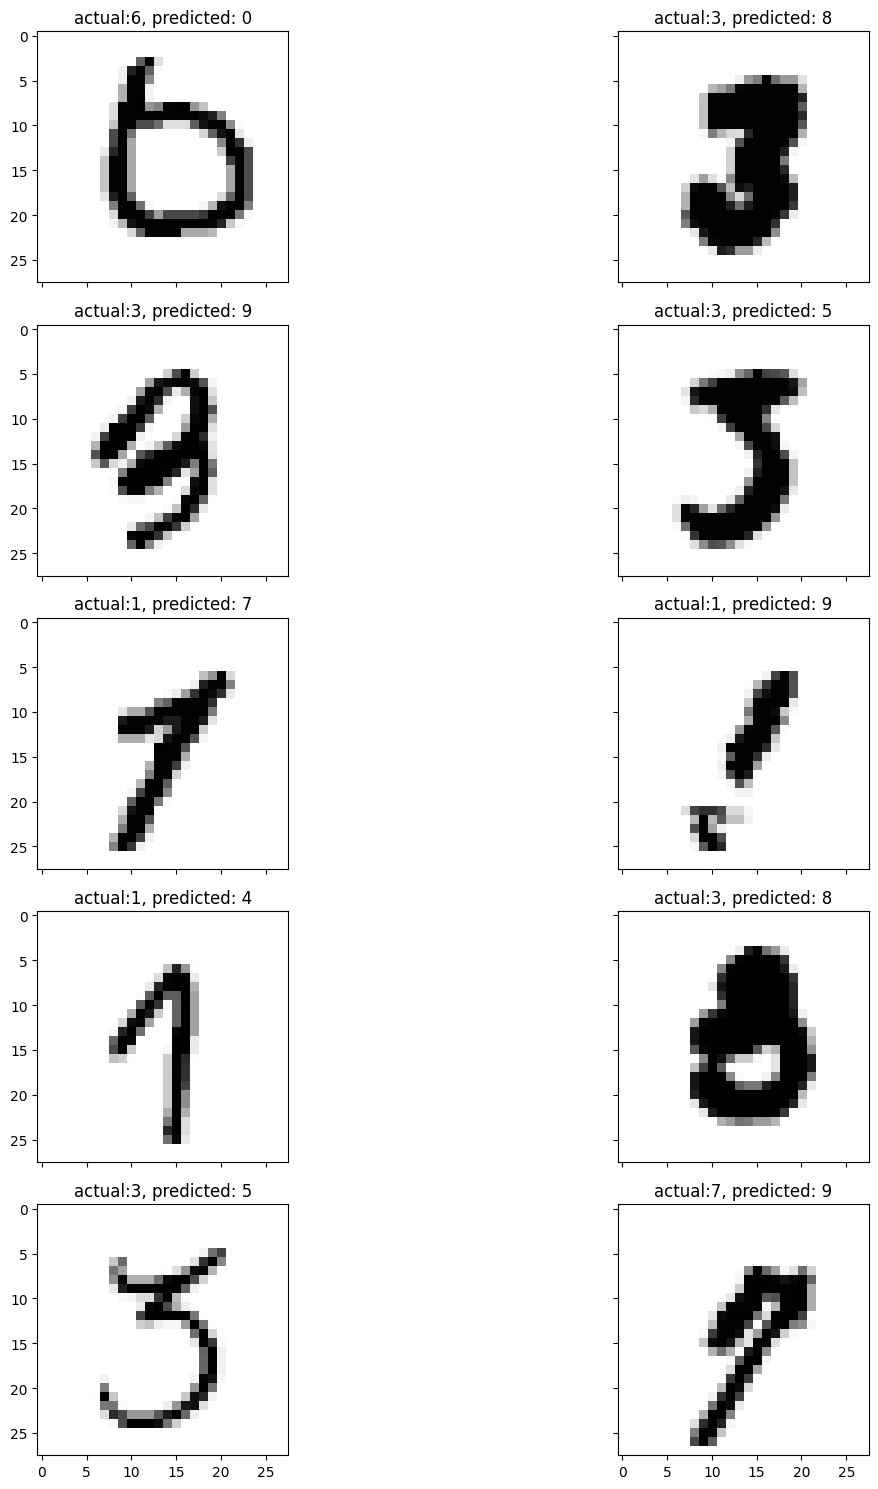

In [ ]:
badClassified = y_result_train != np.argmax(y_train, axis=1)
badClassified_labels = np.argmax(y_train[badClassified], axis=1)
badClassified = x_train[badClassified]
badClassified_predicted = np.argmax(model.predict(badClassified), axis=1)

fig, ax = plt.subplots(nrows=5, ncols=2, sharex=True, sharey=True, figsize=(15,15))
ax = ax.flatten()

for i in range(10):
    img = badClassified[i].reshape(28,28)
    ax[i].imshow( img, cmap='Greys')
    ax[i].set_title(f'actual:{badClassified_labels[i]}, predicted: {badClassified_predicted[i]}')
plt.tight_layout()
plt.show()

In [ ]:
import cv2
import os

In [ ]:
imgs = os.listdir(r'/content/Images')

In [ ]:
#imgs = imgs[:-1]

In [ ]:
imgs

['1.jpg',
 '4.jpg',
 '0.jpg',
 '5.jpg',
 '3.jpg',
 '6.jpg',
 '8.jpg',
 '2.jpg',
 '7.jpg',
 '9.jpg']

In [ ]:
digits = []
for img in imgs:
    dig = cv2.imread(r'/content/Images/'+img, cv2.IMREAD_GRAYSCALE)
    # print(type(dig))
    dig = cv2.resize(dig, (28,28))
    dig = np.reshape(dig, (1,28*28))
    dig = dig/255
    dig = np.abs(dig-1)
    # print(dig)
    digits.append(dig)

In [ ]:
type(digits[0]), digits[0].shape

(numpy.ndarray, (1, 784))

In [ ]:
imgs[0].split('.')[0]

'1'

In [ ]:
model.predict(digits[0].reshape(1, 28*28))

1/1 [==============================] - 0s 21ms/step


array([[3.4333750e-10, 1.2358825e-03, 2.7006567e-05, 6.4812213e-01,
        1.5354542e-09, 3.3039015e-08, 1.2858241e-11, 2.8134717e-02,
        3.2202423e-01, 4.5598019e-04]], dtype=float32)

1/1 [==============================] - 0s 31ms/step


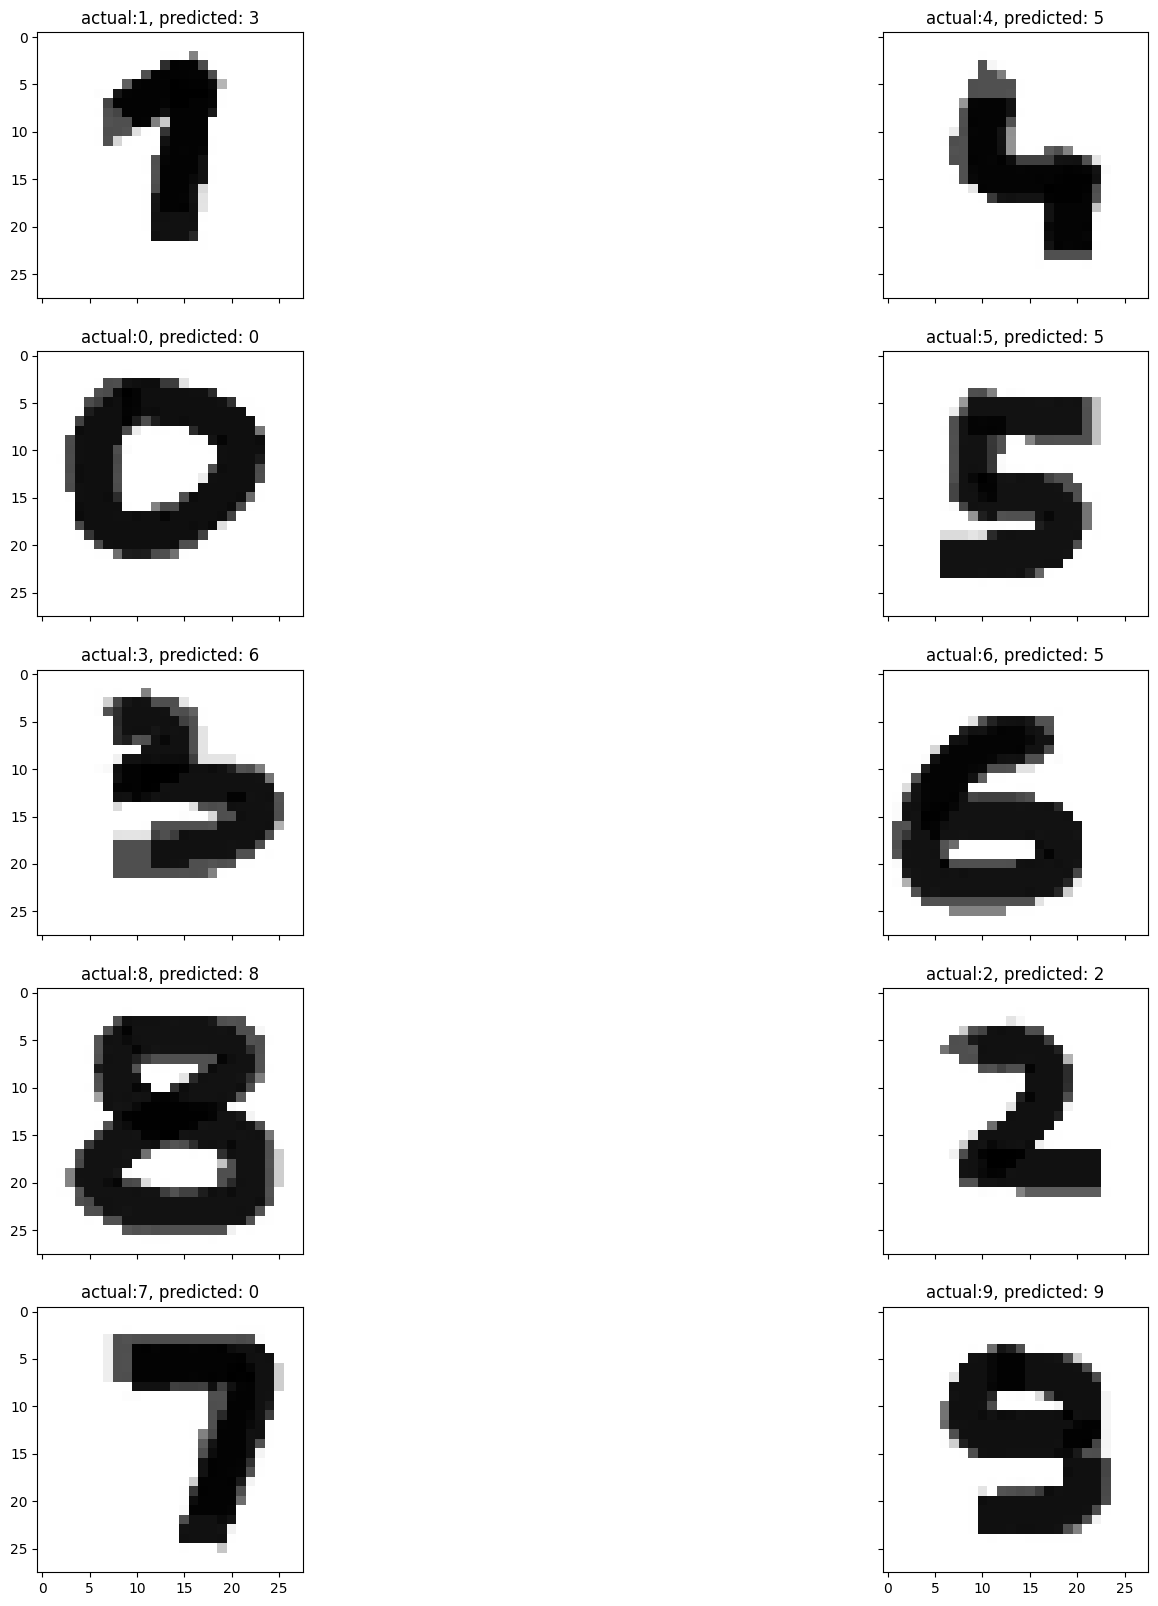

In [ ]:
fig, ax = plt.subplots(nrows=int(len(digits)/2), ncols=2, sharex=True, sharey=True, figsize=(20,20))
ax = ax.flatten()

for i in range(len(digits)):
    actual = imgs[i].split('.')[0]
    predicted = np.argmax(model.predict(digits[i].reshape(1, 28*28)), axis=1)[0]
    ax[i].imshow(digits[i].reshape((28,28)),cmap='Greys')
    ax[i].set_title(f'actual:{actual}, predicted: {predicted}')
# plt.tight_layout()
plt.show()